In [1]:
import cv2
import time

In [3]:
from IPython.display import display, Image, clear_output
import PIL.Image

In [5]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [7]:
cap = cv2.VideoCapture(0) 

In [9]:
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640) 
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)  

True

In [11]:
frame_count = 0
detection_interval = 5 

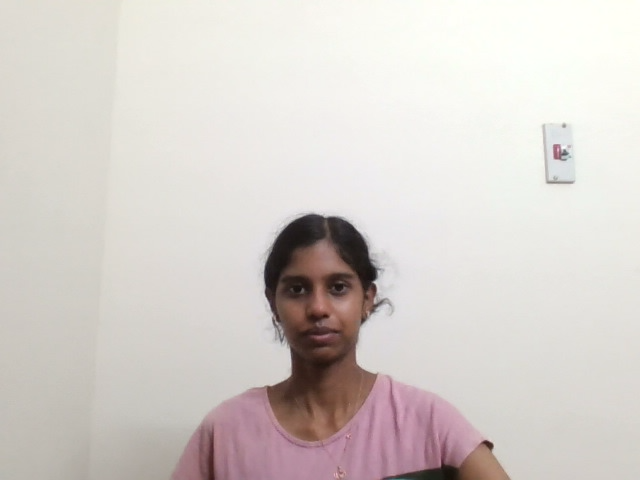

In [ ]:
try:
    while True:
        
        ret, frame = cap.read()

        if not ret:
            print("Failed to grab frame")
            break
        
        
        frame = cv2.resize(frame, (640, 480))

    
        frame_count += 1

        if frame_count % detection_interval == 0:
            # Step 8: Convert the frame to grayscale for better detection performance
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Step 9: Detect faces in the grayscale frame
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=7, minSize=(30, 30))
            
            # Step 10: Draw rectangles around the detected faces
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Step 11: Convert the frame to RGB for displaying in Jupyter Notebook
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        img_pil = PIL.Image.fromarray(frame_rgb)
        clear_output(wait=True)  
        display(img_pil)  

        
        time.sleep(0.05)

except KeyboardInterrupt:
    print("Stopped by user")


cap.release()